# 텐서플로 허브(Tensorflow Hub)
* 텐서플로 허브는 재사용 가능한 모델을 쉽게 이용할 수 있는 라이브러리 
* 이미지, 텍스트, 비디오 등의 분야에서 사전 훈련된 모델들을 검색
* 텐서플로우 2.0부터는 따로 설치할 필요 없지만 연동이 안되면 pip install tensorflow-hub 로 따로 설치

In [2]:
import tensorflow as tf
import tensorflow_hub as hub
tf.__version__

'2.1.0'

#### 텐서플로 허브에서 사전 훈련된 MobileNet 모델 불러오기
* 컨볼루션 신경망의 하나인  MobileNet 버전 2를 불러옴
* ImageNet에 존재하는 1000 종류의 이미지를 분류 --> 해당되는 경우가 없으면 background에 해당하는 인덱스 0을 반환 

In [3]:
mobile_net_url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/2"
model = tf.keras.Sequential([
    hub.KerasLayer(handle=mobile_net_url, input_shape=(224, 224, 3), trainable=False)
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1001)              3540265   
Total params: 3,540,265
Trainable params: 0
Non-trainable params: 3,540,265
_________________________________________________________________


#### 좌측 전체 네트워크 구조 출력 코드

In [5]:
from tensorflow.keras.applications import MobileNetV2
import pydot
import graphviz
mobilev2 = MobileNetV2()
tf.keras.utils.plot_model(mobilev2)

14540800/14536120 [==============================] - 8s 1us/step
Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.


#### ImageNetV2 데이터 불러오기 

In [7]:
import os
import pathlib

content_data_url = 'D:/SRC/New_Python/TF2_WS/PTM'
data_root_orig = tf.keras.utils.get_file('imagenetV2', 'https://s3-us-west-2.amazonaws.com/imagenetv2public/imagenetv2-topimages.tar.gz', cache_dir=content_data_url, extract=True)
data_root = pathlib.Path(content_data_url + '/datasets/imagenetv2-topimages')
print(data_root)

606355456/606351360 [==============================] - 119s 0us/step
D:\SRC\New_Python\TF2_WS\PTM\datasets\imagenetv2-topimages


#### 디렉토리 출력
* 실제 하위 디렉토리는 1000개 

In [8]:
for idx, item in enumerate(data_root.iterdir()):
    print(item)
    if idx==9:
        break

D:\SRC\New_Python\TF2_WS\PTM\datasets\imagenetv2-topimages\0
D:\SRC\New_Python\TF2_WS\PTM\datasets\imagenetv2-topimages\1
D:\SRC\New_Python\TF2_WS\PTM\datasets\imagenetv2-topimages\10
D:\SRC\New_Python\TF2_WS\PTM\datasets\imagenetv2-topimages\100
D:\SRC\New_Python\TF2_WS\PTM\datasets\imagenetv2-topimages\101
D:\SRC\New_Python\TF2_WS\PTM\datasets\imagenetv2-topimages\102
D:\SRC\New_Python\TF2_WS\PTM\datasets\imagenetv2-topimages\103
D:\SRC\New_Python\TF2_WS\PTM\datasets\imagenetv2-topimages\104
D:\SRC\New_Python\TF2_WS\PTM\datasets\imagenetv2-topimages\105
D:\SRC\New_Python\TF2_WS\PTM\datasets\imagenetv2-topimages\106


#### ImageNet 라벨 텍스트 불러오기

In [9]:
label_file = tf.keras.utils.get_file('label', 'https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
label_text = None
with open(label_file, 'r') as f:
    label_text = f.read().split('\n')[:-1]
print(len(label_text))
print(label_text[:10])
print(label_text[-10:])    

16384/10484 [==============================================] - 0s 0us/step
1001
['background', 'tench', 'goldfish', 'great white shark', 'tiger shark', 'hammerhead', 'electric ray', 'stingray', 'cock', 'hen']
['buckeye', 'coral fungus', 'agaric', 'gyromitra', 'stinkhorn', 'earthstar', 'hen-of-the-woods', 'bolete', 'ear', 'toilet tissue']


#### 이미지 확인
* 랜덤하게 9장 출력
* glob는 파일들의 목록을 뽑을 때 사용
* 윈도우에서는 split('/') 대신에 split('\\') 사용
* 라벨 텍스트에는 background(0번)가 포함되어 전체 1001개의 텍스트가 있어야하기 때문에 idx = int(image_path.split('\\')[-2]) + 1을 수행해서 1~1000까지 레벨 텍스트와 동일한 값을 가리키도록 한다. 

image_count : 10000
D:\SRC\New_Python\TF2_WS\PTM\datasets\imagenetv2-topimages\613\2.jpeg
D:\SRC\New_Python\TF2_WS\PTM\datasets\imagenetv2-topimages\93\9.jpeg
D:\SRC\New_Python\TF2_WS\PTM\datasets\imagenetv2-topimages\390\2.jpeg
D:\SRC\New_Python\TF2_WS\PTM\datasets\imagenetv2-topimages\87\9.jpeg
D:\SRC\New_Python\TF2_WS\PTM\datasets\imagenetv2-topimages\912\6.jpeg
D:\SRC\New_Python\TF2_WS\PTM\datasets\imagenetv2-topimages\391\2.jpeg
D:\SRC\New_Python\TF2_WS\PTM\datasets\imagenetv2-topimages\90\5.jpeg
D:\SRC\New_Python\TF2_WS\PTM\datasets\imagenetv2-topimages\723\1.jpeg
D:\SRC\New_Python\TF2_WS\PTM\datasets\imagenetv2-topimages\202\0.jpeg


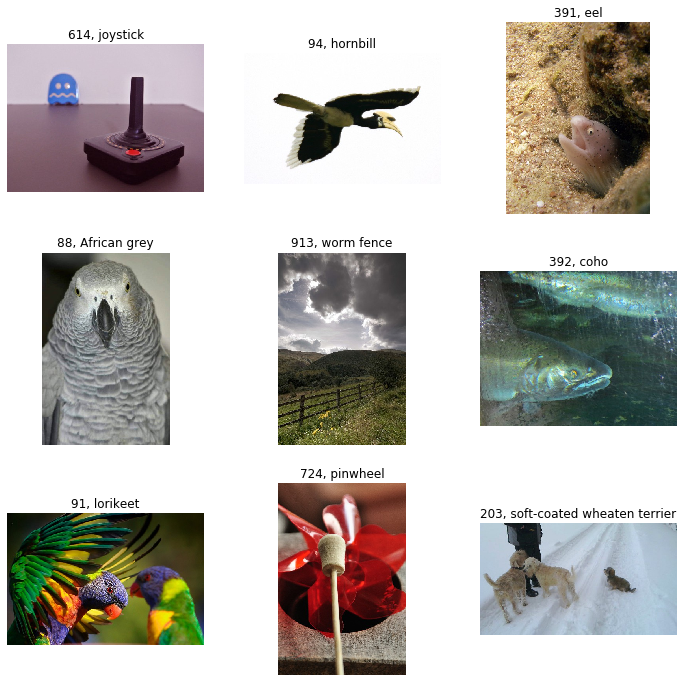

In [11]:
import PIL.Image as Image
import matplotlib.pyplot as plt
import random

all_image_paths = list(data_root.glob('*/*'))
all_image_paths = [str(path) for path in all_image_paths]

# 이미지를 랜덤하게 섞기 
random.shuffle(all_image_paths)

image_count = len(all_image_paths)
print('image_count :', image_count)

plt.figure(figsize=(12,12))
for c in range(9):
    image_path = random.choice(all_image_paths)
    print(image_path)
    plt.subplot(3,3,c+1)
    plt.imshow(plt.imread(image_path))
    idx = int(image_path.split('\\')[-2]) + 1
    
    plt.title(str(idx) + ', ' + label_text[idx])
    plt.axis('off')
plt.show()

#### MobileNet의 분류 성능 확인
* Top-5 정확도를 분류 정확도로 측정
* cuDNN 버전문제 발생... 확인 필요!!

In [13]:
import cv2
import numpy as np

top_1 = 0
top_5 = 0
for image_path in all_image_paths:
    img = cv2.imread(image_path)
    img = cv2.resize(img, dsize=(224, 224))
    img = img / 255.0
    img = np.expand_dims(img, axis=0)
    top_5_predict = model.predict(img)[0].argsort()[::-1][:5]
    idx = int(image_path.split('\\')[-2])+1
    if idx in top_5_predict:
        top_5 += 1
        if top_5_predict[0] == idx:
            top_1 += 1

print('Top-5 correctness:', top_5 / len(all_image_paths) * 100, '%')
print('Top-1 correctness:', top_1 / len(all_image_paths) * 100, '%')

Top-5 correctness: 83.84 %
Top-1 correctness: 59.45 %


In [14]:
a = np.array([99,32,5,64])
arg = np.argsort(a)
print(arg)
print(np.sort(a))
print(a[arg])

[2 1 3 0]
[ 5 32 64 99]
[ 5 32 64 99]


#### MobileNet의 분류 라벨 확인

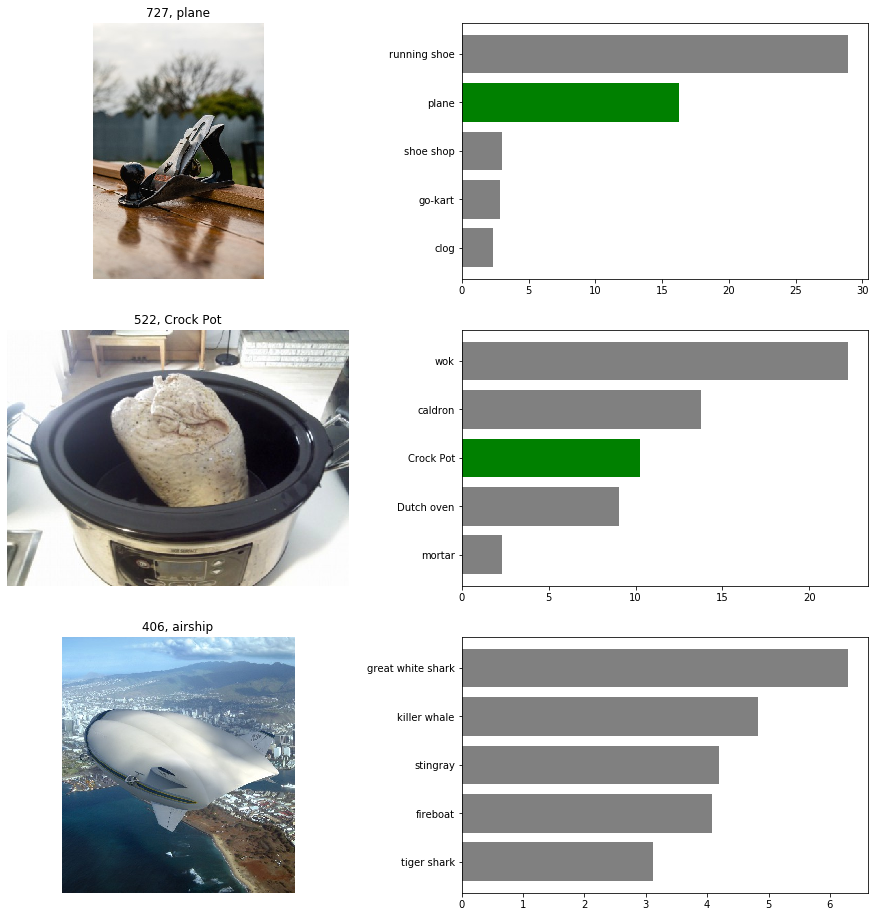

In [15]:
plt.figure(figsize=(16,16))

def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)
  
for c in range(3):
    image_path = random.choice(all_image_paths)
    
    # 이미지 표시
    plt.subplot(3,2,c*2+1)
    plt.imshow(plt.imread(image_path))
    idx = int(image_path.split('\\')[-2]) + 1
    plt.title(str(idx) + ', ' + label_text[idx])
    plt.axis('off')
    
    # 예측값 표시
    plt.subplot(3,2,c*2+2)
    img = cv2.imread(image_path)
    img = cv2.resize(img, dsize=(224, 224))
    img = img / 255.0
    img = np.expand_dims(img, axis=0)
    
    # MobileNet을 이용한 예측
    logits = model.predict(img)[0]
    prediction = softmax(logits)
    
    # 가장 높은 확률의 예측값 5개를 뽑음
    top_5_predict = prediction.argsort()[::-1][:5]
    labels = [label_text[index] for index in top_5_predict]
    color = ['gray'] * 5
    if idx in top_5_predict:
        color[top_5_predict.tolist().index(idx)] = 'green'
    color = color[::-1]
    plt.barh(range(5), prediction[top_5_predict][::-1] * 100, color=color)
    plt.yticks(range(5), labels[::-1])    